In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# load dataset
# dataset = pd.read_csv('cleaned.csv', header=0, index_col=0)
# dataset.head()

In [15]:
# Read the data into a pandas dataframe
dataset = pd.read_csv('cleaned.csv', parse_dates=['date'])

In [16]:
# Set parameters for seaborn plots
mpl.rcParams['figure.figsize'] = (15, 15)
mpl.rcParams['axes.grid'] = False

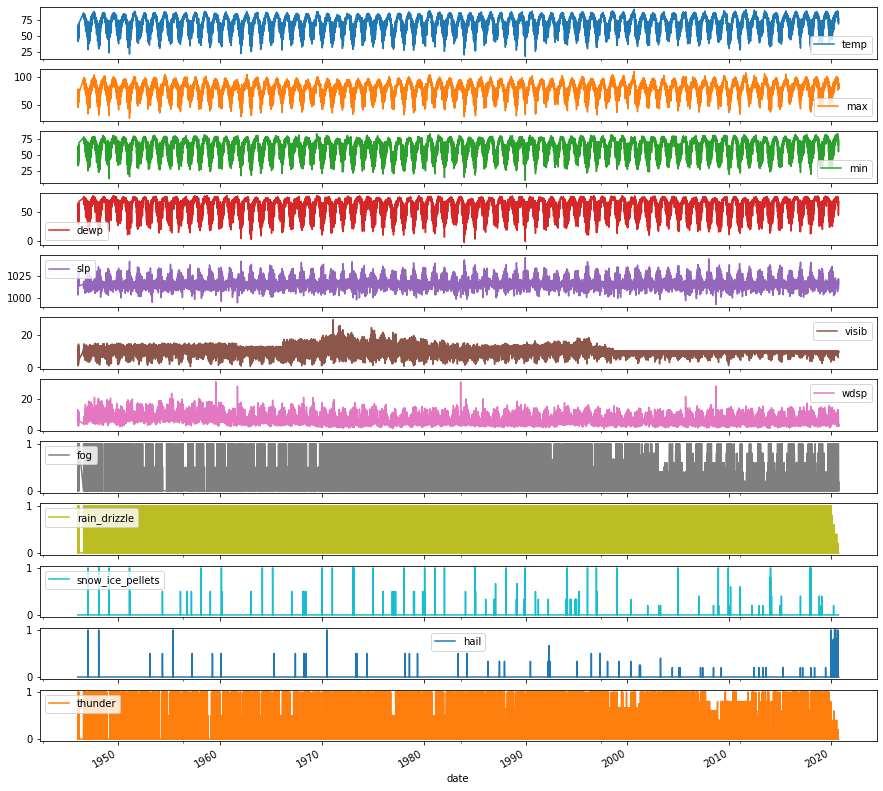

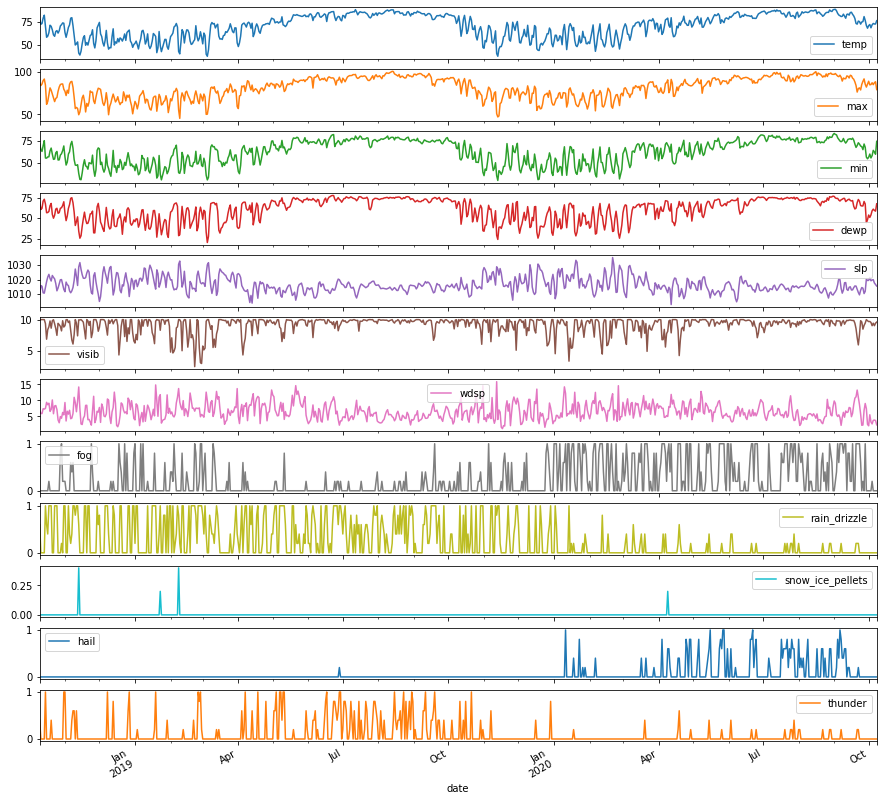

In [17]:
dataset.drop(columns=['mxpsd'], inplace=True)
# Plot data for all records
plot_cols = ['temp','max','min','dewp', 'slp', 'visib', 'wdsp','fog','rain_drizzle','snow_ice_pellets','hail','thunder']
plot_features = dataset[plot_cols]
plot_features.index = dataset['date']
_ = plot_features.plot(subplots=True)

# Plot data temperature, presure, visibility and windspeed for the last 730 days
plot_features = dataset[plot_cols][-730:]
plot_features.index = dataset['date'][-730:]
_ = plot_features.plot(subplots=True)

In [19]:
# Look at the statistics for the data
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,27140.0,69.156177,12.749836,17.633333,60.130000,71.75,80.08,91.266667
dewp,27140.0,59.646698,14.121464,-2.300000,49.950000,64.00,71.70,78.400000
slp,27140.0,1016.848580,5.285867,992.550000,1013.566667,1016.20,1019.60,1045.133333
visib,27140.0,10.020073,2.749218,0.400000,8.500000,9.84,11.60,29.400000
wdsp,27140.0,6.814156,2.955598,0.600000,4.600000,6.32,8.60,31.300000
max,27140.0,79.780102,12.483712,26.300000,72.300000,81.80,89.84,109.366667
min,27140.0,60.597889,13.533751,9.433333,50.300000,63.60,72.75,83.160000
fog,27140.0,0.282940,0.391893,0.000000,0.000000,0.00,0.50,1.000000
rain_drizzle,27140.0,0.353969,0.436837,0.000000,0.000000,0.00,1.00,1.000000
snow_ice_pellets,27140.0,0.002789,0.046058,0.000000,0.000000,0.00,0.00,1.000000


In [21]:
# Difference the dataset by 365 days
df = dataset.diff(periods=365).dropna()

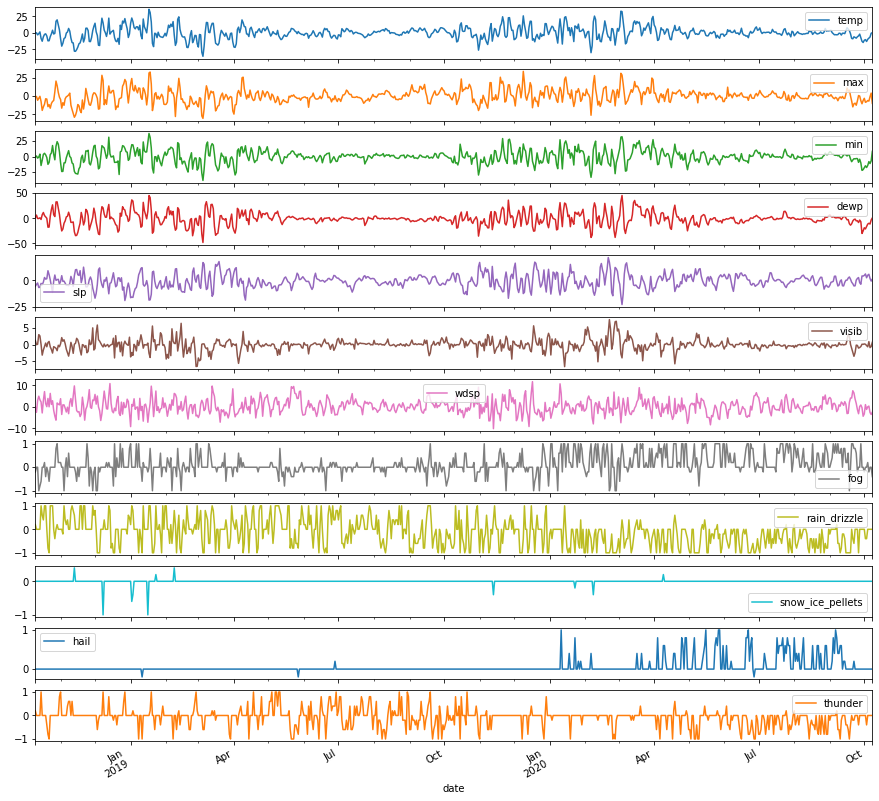

In [23]:
# Plot data after making the dataset stationary
plot_features = df[plot_cols][-730:]
plot_features.index = dataset['date'][-730:]
_ = plot_features.plot(subplots=True)

In [37]:
# Set parameters for seaborn plots below
mpl.rcParams['figure.figsize'] = (7,5)
mpl.rcParams['axes.grid'] = False

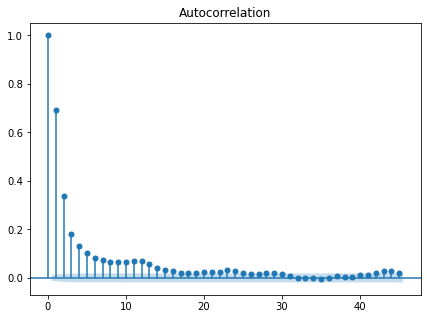

In [38]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(df['temp'])
plt.show()

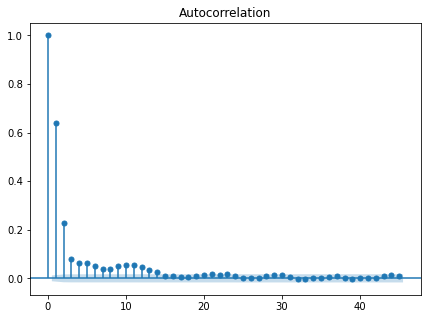

In [39]:
sm.graphics.tsa.plot_acf(df['dewp'])
plt.show()

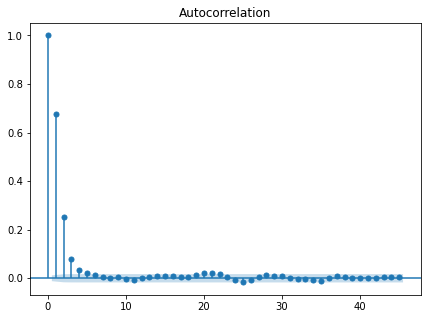

In [40]:
sm.graphics.tsa.plot_acf(df['slp'])
plt.show()

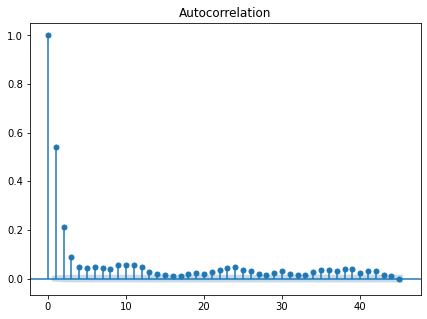

In [41]:
sm.graphics.tsa.plot_acf(df['visib'])
plt.show()

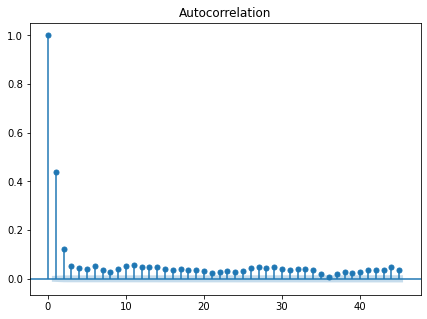

In [42]:
sm.graphics.tsa.plot_acf(df['wdsp'])
plt.show()

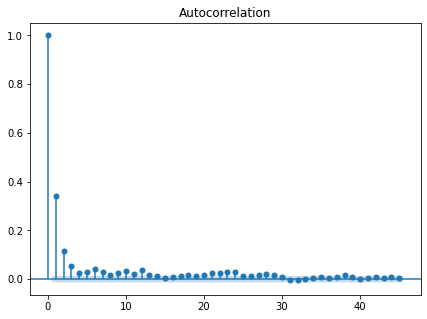

In [43]:
sm.graphics.tsa.plot_acf(df['fog'])
plt.show()

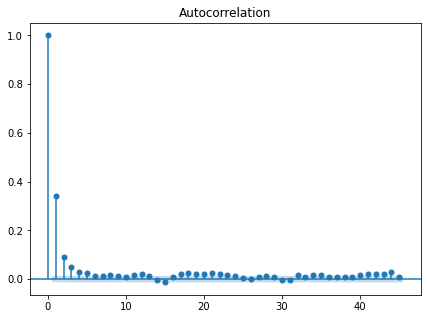

In [44]:
sm.graphics.tsa.plot_acf(df['rain_drizzle'])
plt.show()

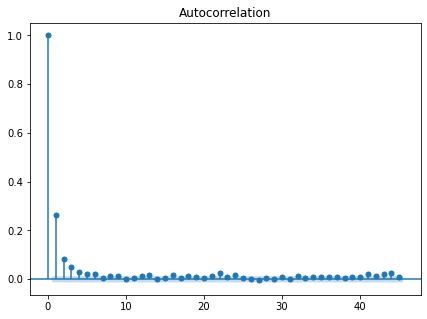

In [45]:
sm.graphics.tsa.plot_acf(df['thunder'])
plt.show()

In [20]:
df.to_csv('differenced_data.csv')